# Анализ рынка труда на основе спарсенных данных с сайта Hh.ru за март

Описание: анализ базы вакансий с Hh.ru

Цель: выявить различия в предлагаемых вакансиях для соискателей на должность "Аналитик данных" и "Бизнес аналитик"

# План
1. Импорт библиотек и настройка опций для графиков
2. Загрузка данных
3. Предобработка данных
4. Исследовательский анализ данных с целью:
- определить портрет идеального кандидата на должность "Аналитик данных" и "Бизнес аналитик" с тз оценки хард и софт скиллов, опыта работы для различных грейдов (от джуна до сеньора)
- определить типичные условия работы (ТОП работодателей, з/п, тип занятости, график) для различных грейдов (от джуна до сеньора)
- помесячная динамика вакансий
5. Выводы и рекомендации
6. Презентация

# импортируем библиотеки и устанавливаем настройки

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import math
import json
pd.set_option('display.float_format', '{:,.2f}'.format) #преобразуем экспоненциальный формат

In [ ]:
# устанавливаем стиль графиков
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":100, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

# импортируем файлы в colab с компа

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vacancies_ba.xlsx to vacancies_ba.xlsx


In [ ]:
df_one = pd.read_excel(open('vacancies_ba.xlsx','rb'))
df_one.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vacancies_da.xlsx to vacancies_da.xlsx


In [ ]:
df_two = pd.read_excel(open('vacancies_da.xlsx','rb'))
df_two.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",Полный день,Полная занятость,на масштабный проект по созданию единого корпо...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,NaN,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",Полный день,Полная занятость,системный аналитик (инф. взаимодействие между ...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),"['Data Catalog', 'Data Governance', 'DMBOK DAM...",Полный день,Полная занятость,мтс – это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",NaN,NaN
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,NaN,Владимир,Junior+ (1-3 years),"['Spark', 'Data Analysis', 'Теория вероятносте...",Полный день,Полная занятость,наши преимущества: аккредитованная ит-компан...,наш преимущество аккредитовать ита компания си...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",NaN,NaN
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,NaN,Москва,Junior+ (1-3 years),"['MS Access', 'Управление проектами', 'Olap (o...",Полный день,Полная занятость,"evyap rus – международная fmcg компания, произ...",evyap rus международный fmcg компания производ...,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",NaN,Документация


# знакомство с данными

In [ ]:
display(f"Объем датафрейма:{len(df_one)}")
display(df_one.info())
df_one.describe()

'Объем датафрейма:1011'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   alternate_url                     1011 non-null   object        
 4   type                              1011 non-null   object        
 5   employer                          1011 non-null   object        
 6   department                        210 non-null    object        
 7   area                              1011 non-null   object        
 8   experience                        1011 non-null   object        
 9   key_skills                        1011 non-null   object        
 10  schedule                          1011 non-null 

None

,id,published_at,salary_from,salary_to
count,"1,011.00",1011,172.00,132.00
mean,"94,207,462.75",2024-03-22 16:19:55.533135616,"119,151.35","163,620.37"
min,"77,538,397.00",2024-03-12 23:44:07,"30,000.00","40,000.00"
25%,"93,797,886.00",2024-03-18 15:52:19,"70,000.00","100,000.00"
50%,"94,973,317.00",2024-03-22 11:43:56,"100,000.00","150,000.00"
75%,"95,416,291.50",2024-03-27 10:43:52.500000,"150,000.00","200,000.00"
max,"95,843,394.00",2024-03-31 18:20:38,"327,250.00","467,500.00"
std,"2,073,456.57",NaN,"64,347.69","81,081.96"


In [ ]:
#поиск отсутсвующих значений
for col in df_one.columns:
    pct_missing = np.mean(df_one[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
name - 0%
published_at - 0%
alternate_url - 0%
type - 0%
employer - 0%
department - 79%
area - 0%
experience - 0%
key_skills - 0%
schedule - 0%
employment - 0%
description - 0%
description_lemmatized - 0%
salary_from - 83%
salary_to - 87%
salary_bin - 0%
key_skills_from_key_skills_field - 44%
hard_skills_from_description - 83%
soft_skills_from_description - 39%


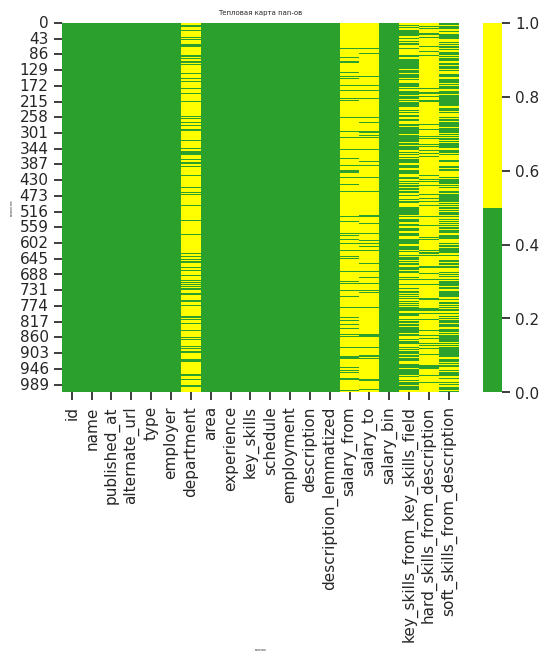

In [ ]:
cols = df_one.columns[:20] # 20 колонок
# желтый - nan, зеленый - не nan
colours = ['#2ca02c', '#ffff00']
sns.heatmap(df_one[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Тепловая карта nan-ов', fontsize = 5) # title with fontsize 20
plt.xlabel('колонка', fontsize = 2) # x-axis label with fontsize 15
plt.ylabel('количество', fontsize = 2) # y-axis label with fontsize 15
plt.show()

In [ ]:
#поиск дубликатов
df_one[df_one.duplicated ()]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


In [ ]:
display(f"Объем датафрейма:{len(df_two)}")
display(df_two.info())
df_two.describe()

'Объем датафрейма:417'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                417 non-null    int64         
 1   name                              417 non-null    object        
 2   published_at                      417 non-null    datetime64[ns]
 3   alternate_url                     417 non-null    object        
 4   type                              417 non-null    object        
 5   employer                          417 non-null    object        
 6   department                        137 non-null    object        
 7   area                              417 non-null    object        
 8   experience                        417 non-null    object        
 9   key_skills                        417 non-null    object        
 10  schedule                          417 non-null    

None

,id,published_at,salary_from,salary_to
count,417.00,417,57.00,30.00
mean,"94,294,657.84",2024-03-22 16:42:25.371702528,"111,544.47","206,959.00"
min,"77,320,677.00",2024-03-12 21:40:27,"28,940.00","36,175.00"
25%,"93,807,631.00",2024-03-18 16:22:17,"70,000.00","100,000.00"
50%,"94,964,662.00",2024-03-22 13:32:49,"90,000.00","200,000.00"
75%,"95,438,508.00",2024-03-26 16:55:15,"137,000.00","300,000.00"
max,"95,846,083.00",2024-03-31 22:20:48,"350,000.00","400,000.00"
std,"2,103,718.50",NaN,"64,616.09","109,378.97"


In [ ]:
#поиск отсутсвующих значений
for col in df_two.columns:
    pct_missing = np.mean(df_two[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
name - 0%
published_at - 0%
alternate_url - 0%
type - 0%
employer - 0%
department - 67%
area - 0%
experience - 0%
key_skills - 0%
schedule - 0%
employment - 0%
description - 0%
description_lemmatized - 0%
salary_from - 86%
salary_to - 93%
salary_bin - 0%
key_skills_from_key_skills_field - 43%
hard_skills_from_description - 78%
soft_skills_from_description - 68%


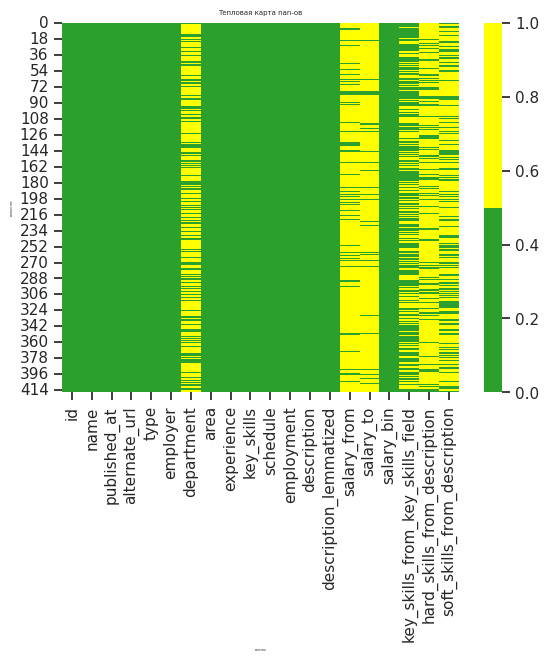

In [ ]:
cols = df_two.columns[:20] # 20 колонок
# желтый - nan, зеленый - не nan
colours = ['#2ca02c', '#ffff00']
sns.heatmap(df_two[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Тепловая карта nan-ов', fontsize = 5) # title with fontsize 20
plt.xlabel('колонка', fontsize = 2) # x-axis label with fontsize 15
plt.ylabel('количество', fontsize = 2) # y-axis label with fontsize 15
plt.show()

In [ ]:
#поиск дубликатов
df_two[df_two.duplicated ()]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description


# Промежуточный вывод

Размер предоставленных для анализа фреймов разный.

Формат данных подходит для работы, явных дубликатов нет

Явных аномалий в данных нет, тк разница между медианой и средним небольшая

Есть проблемные колонки с большим количеством пропусков:
- key_skills_from_key_skills_field - 43%,
- hard_skills_from_description - 78%,
- soft_skills_from_description - 68%

Значения в колонках могут пересекаться и зависят от человеческого фактора.
В ряде данных есть пропуски (например, salary_from - 86%
salary_to - 93%), удалить которые не получится, тк % пропусков разный, и это исказит исследование.

# Объединение фреймов

In [ ]:
display(df_one.head(2))
display(df_two.head(2))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",Полный день,Полная занятость,на масштабный проект по созданию единого корпо...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,NaN,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",Полный день,Полная занятость,системный аналитик (инф. взаимодействие между ...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN


In [ ]:
#тк шапки и содержание одинаковые сделаем конкатом
df= pd.concat([df_one, df_two],ignore_index=True)
display(len(df))
display(len(df['id'].unique()))
#тут получается, что как бы есть одинаковые строки, посмотрим по id

1428

1412

In [ ]:
duplicate = df[df.duplicated('id')]
len(duplicate)

16

In [ ]:
df.drop_duplicates().reset_index(drop=True)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,95815979,Ведущий аналитик данных отчетности по продукта...,2024-03-29 18:38:00,https://hh.ru/vacancy/95815979,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,наша команда занимается созданием и развитием ...,наш команда заниматься создание развитие анали...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
1408,95816394,Аналитик данных (Senior),2024-03-29 18:55:30,https://hh.ru/vacancy/95816394,Открытая,Альфа-Банк,Альфа-Банк,Москва,Middle (3-6 years),"['Power BI', 'MS Excel', 'SQL', 'Pandas', 'Pyt...",Полный день,Полная занятость,чем предстоит заниматься: регулярно готовить ...,предстоять заниматься регулярно готовить ежене...,NaN,NaN,ЗП не указана,"SQL, ORACLE, Power BI, Python, MS Excel",Pandas,NaN
1409,95818485,"Data Scientist/Analyst ""Платформа эксперименто...",2024-03-29 19:52:46,https://hh.ru/vacancy/95818485,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['SQL', 'A/B тесты', 'confluence', 'Python']",Полный день,Полная занятость,a/b эксперименты – ключевой инструмент для при...,a b эксперимент ключевой инструмент принятие р...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN
1410,95843464,Аналитик данных,2024-03-31 17:21:24,https://hh.ru/vacancy/95843464,Открытая,"ЭТМ, компания",NaN,Санкт-Петербург,Junior+ (1-3 years),"['Power BI', 'Аналитическое мышление', 'MS Exc...",Полный день,Полная занятость,цель должности: работа в аналитическом управле...,цель должность работа аналитический управление...,NaN,"93,750.00",Меньше 100 тысяч,"MS Excel, MS PowerPoint, MS SQL, Power BI, Ста...",NaN,Аналитическое мышление


# Обработка пропущенных значений

In [ ]:
#обработаем пропуски salary, если в одном из полей значение есть, а в другом нет, то заменим на него, если в обоих nan, то поставим н/д
df['salary_from'][(df['salary_from'].isna()) | (df['salary_from'] == 'Null')] = df['salary_to']
df['salary_to'][(df['salary_to'].isna()) | (df['salary_to'] == 'Null')] = df['salary_from']
df

<ipython-input-19-2f4d861ba9d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_from'][(df['salary_from'].isna()) | (df['salary_from'] == 'Null')] = df['salary_to']
<ipython-input-19-2f4d861ba9d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_to'][(df['salary_to'].isna()) | (df['salary_to'] == 'Null')] = df['salary_from']


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,95815979,Ведущий аналитик данных отчетности по продукта...,2024-03-29 18:38:00,https://hh.ru/vacancy/95815979,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,наша команда занимается созданием и развитием ...,наш команда заниматься создание развитие анали...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
1424,95816394,Аналитик данных (Senior),2024-03-29 18:55:30,https://hh.ru/vacancy/95816394,Открытая,Альфа-Банк,Альфа-Банк,Москва,Middle (3-6 years),"['Power BI', 'MS Excel', 'SQL', 'Pandas', 'Pyt...",Полный день,Полная занятость,чем предстоит заниматься: регулярно готовить ...,предстоять заниматься регулярно готовить ежене...,NaN,NaN,ЗП не указана,"SQL, ORACLE, Power BI, Python, MS Excel",Pandas,NaN
1425,95818485,"Data Scientist/Analyst ""Платформа эксперименто...",2024-03-29 19:52:46,https://hh.ru/vacancy/95818485,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['SQL', 'A/B тесты', 'confluence', 'Python']",Полный день,Полная занятость,a/b эксперименты – ключевой инструмент для при...,a b эксперимент ключевой инструмент принятие р...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN
1426,95843464,Аналитик данных,2024-03-31 17:21:24,https://hh.ru/vacancy/95843464,Открытая,"ЭТМ, компания",NaN,Санкт-Петербург,Junior+ (1-3 years),"['Power BI', 'Аналитическое мышление', 'MS Exc...",Полный день,Полная занятость,цель должности: работа в аналитическом управле...,цель должность работа аналитический управление...,"93,750.00","93,750.00",Меньше 100 тысяч,"MS Excel, MS PowerPoint, MS SQL, Power BI, Ста...",NaN,Аналитическое мышление


In [ ]:
#заменим оставшиеся пропуски в з/п на н/д
df.salary_from.fillna("н/д", inplace = True)
df.salary_to.fillna("н/д", inplace = True)

In [ ]:
# пропуски в department
df_department = df.query('department.isna()')

In [ ]:
df_department['employer'].unique()

array(['Первая Форма', 'Газпром нефть', 'MedmaGroup',
       'Главгосэкспертиза России', 'Комус', 'Совкомбанк', 'Цемрос',
       'Сбербанк АСТ', 'Группа компаний МЕДСИ', 'DSSL',
       'Performance Group', 'Polymedia', 'Ренна-Холдинг',
       'БиАйЭй-Технолоджиз', 'Торговый Дом Союз-Евразия',
       'Мединвестгрупп', 'Русклимат',
       'Аналитический центр при Правительстве Российской Федерации',
       'ДПО Корпоративный Университет Правительства Нижегородской Области (КУПНО)',
       'Группа Компаний «СУ-555»',
       'The Skolkovo Institute of Science and Technology', 'Grand trade',
       'ФИНАМ', '4people', 'CCS (Center of Corporate Solution)',
       'Софт Нск', 'ИТ-Элемент29', 'БИОКАД, биотехнологическая компания',
       'Мир специй, Производственно-торговый холдинг', 'АТОН', 'NETRIKA',
       'Лига Цифровой Экономики', 'Компания БФК', 'Ньютон Инвестиции',
       'Тинькофф', 'CEMENTUM | ЦЕМЕНТУМ', 'АЛЬЯНС КРЕДИТ', 'iBOX',
       'Softline',
       'Отраслевой центр разработки 

In [ ]:
#заменим пропуски на н/д
df.department.fillna("н/д", inplace = True)

In [ ]:
#посмотрим, что там со скиллами
df_new = df[['experience','key_skills', 'key_skills_from_key_skills_field','hard_skills_from_description','soft_skills_from_description']]
df_new

,experience,key_skills,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...","MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,Middle (3-6 years),"['Документация', 'Коммуникация']",NaN,NaN,"Коммуникация, Документация"
2,Junior (no experince),"['Управление проектами', 'Разработка техническ...","Управление проектами, Разработка технических з...",NaN,Документация
3,Junior+ (1-3 years),['Аналитическое мышление'],NaN,NaN,Аналитическое мышление
4,Junior+ (1-3 years),['Документация'],NaN,NaN,Документация
...,...,...,...,...,...
1423,Junior+ (1-3 years),['Аналитическое мышление'],NaN,NaN,Аналитическое мышление
1424,Middle (3-6 years),"['Power BI', 'MS Excel', 'SQL', 'Pandas', 'Pyt...","SQL, ORACLE, Power BI, Python, MS Excel",Pandas,NaN
1425,Middle (3-6 years),"['SQL', 'A/B тесты', 'confluence', 'Python']","Python, SQL, A/B тесты",confluence,NaN
1426,Junior+ (1-3 years),"['Power BI', 'Аналитическое мышление', 'MS Exc...","MS Excel, MS PowerPoint, MS SQL, Power BI, Ста...",NaN,Аналитическое мышление


In [ ]:
#приведем данные к нижнему регистру
for col in ['key_skills']:
    df[col] = df[col].str.lower()
for col in ['key_skills_from_key_skills_field']:
    df[col] = df[col].str.lower()
for col in ['hard_skills_from_description']:
    df[col] = df[col].str.lower()
for col in ['soft_skills_from_description']:
    df[col] = df[col].str.lower()
# заменим пропуски на н/д
df.key_skills_from_key_skills_field.fillna("н/д", inplace = True)
df.hard_skills_from_description.fillna("н/д", inplace = True)
df.soft_skills_from_description.fillna("н/д", inplace = True)

In [ ]:
#добавим дату, месяц и год для дальнейшей аналитики
df['date'] = pd.to_datetime(df['published_at'], format='%Y-%m-%d').dt.floor('D')
df['year'] = pd.DatetimeIndex(df['published_at']).year

In [ ]:
df['week'] = df['date'].dt.weekday
df

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['аналитическое мышление', 'business studio', ...",...,спортмастер международный спортивный ритейлер ...,н/д,н/д,ЗП не указана,"ms visio, business studio, ms powerpoint, опти...",н/д,"документация, аналитическое мышление",2024-03-27,2024,2
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,н/д,Санкт-Петербург,Middle (3-6 years),"['документация', 'коммуникация']",...,рассматривать кандидат весь регион рф готовый ...,н/д,н/д,ЗП не указана,н/д,н/д,"коммуникация, документация",2024-03-22,2024,4
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,н/д,Санкт-Петербург,Junior (no experince),"['управление проектами', 'разработка техническ...",...,команда газпромнефть цифровой решение часть ит...,н/д,н/д,ЗП не указана,"управление проектами, разработка технических з...",н/д,документация,2024-03-18,2024,0
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,н/д,Екатеринбург,Junior+ (1-3 years),['аналитическое мышление'],...,группа медицинский компания quot медма quot об...,н/д,н/д,ЗП не указана,н/д,н/д,аналитическое мышление,2024-03-19,2024,1
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,н/д,Москва,Junior+ (1-3 years),['документация'],...,главгосэкспертиза россия драйвер цифровой тран...,н/д,н/д,ЗП не указана,н/д,н/д,документация,2024-03-18,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,95815979,Ведущий аналитик данных отчетности по продукта...,2024-03-29 18:38:00,https://hh.ru/vacancy/95815979,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),['аналитическое мышление'],...,наш команда заниматься создание развитие анали...,н/д,н/д,ЗП не указана,н/д,н/д,аналитическое мышление,2024-03-29,2024,4
1424,95816394,Аналитик данных (Senior),2024-03-29 18:55:30,https://hh.ru/vacancy/95816394,Открытая,Альфа-Банк,Альфа-Банк,Москва,Middle (3-6 years),"['power bi', 'ms excel', 'sql', 'pandas', 'pyt...",...,предстоять заниматься регулярно готовить ежене...,н/д,н/д,ЗП не указана,"sql, oracle, power bi, python, ms excel",pandas,н/д,2024-03-29,2024,4
1425,95818485,"Data Scientist/Analyst ""Платформа эксперименто...",2024-03-29 19:52:46,https://hh.ru/vacancy/95818485,Открытая,Okko,н/д,Санкт-Петербург,Middle (3-6 years),"['sql', 'a/b тесты', 'confluence', 'python']",...,a b эксперимент ключевой инструмент принятие р...,н/д,н/д,ЗП не указана,"python, sql, a/b тесты",confluence,н/д,2024-03-29,2024,4
1426,95843464,Аналитик данных,2024-03-31 17:21:24,https://hh.ru/vacancy/95843464,Открытая,"ЭТМ, компания",н/д,Санкт-Петербург,Junior+ (1-3 years),"['power bi', 'аналитическое мышление', 'ms exc...",...,цель должность работа аналитический управление...,"93,750.00","93,750.00",Меньше 100 тысяч,"ms excel, ms powerpoint, ms sql, power bi, ста...",н/д,аналитическое мышление,2024-03-31,2024,6


#Промежуточный вывод:
- объединили фреймы в один
- удалили 16 дубликатов
- пропуски в колонках с з/п заменили на н/д
- добавили 3 столбца с датами в разных форматах
- привели к нижнему регистру все скиллы
- пропуски в departement заменили на н/д, тк не всегда employer указывает подразделение, в которое требуется сотрудник; в списке работодателей встречаются компании по подбору сотрудников/ИП и самозанятые, что также делает невозможным определение отдела.
- пропуски в скиллах связаны с тем, что вопрос определения того или иного навыка как ключевого относится к компетенции создателя вакансии, а наличие хард и софт скиллов не всегда прописано в требованиях (key_skills)

# Исследовательский анализ данных

- определить портрет идеального кандидата на должность "Аналитик данных" и "Бизнес аналитик" с тз оценки хард и софт скиллов, опыта работы для различных грейдов (от джуна до сеньора)

In [ ]:
display(df.head(2))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['аналитическое мышление', 'business studio', ...",...,спортмастер международный спортивный ритейлер ...,н/д,н/д,ЗП не указана,"ms visio, business studio, ms powerpoint, опти...",н/д,"документация, аналитическое мышление",2024-03-27,2024,2
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,н/д,Санкт-Петербург,Middle (3-6 years),"['документация', 'коммуникация']",...,рассматривать кандидат весь регион рф готовый ...,н/д,н/д,ЗП не указана,н/д,н/д,"коммуникация, документация",2024-03-22,2024,4


In [ ]:
#названий много, поэтому приведем все к нижнему регистру, чтобы облегчить разграничение специалистов
for col in ['name']:
    df[col] = df[col].str.lower()
df.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week
0,77538397,бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['аналитическое мышление', 'business studio', ...",...,спортмастер международный спортивный ритейлер ...,н/д,н/д,ЗП не указана,"ms visio, business studio, ms powerpoint, опти...",н/д,"документация, аналитическое мышление",2024-03-27,2024,2
1,79582672,бизнес-аналитик / системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,н/д,Санкт-Петербург,Middle (3-6 years),"['документация', 'коммуникация']",...,рассматривать кандидат весь регион рф готовый ...,н/д,н/д,ЗП не указана,н/д,н/д,"коммуникация, документация",2024-03-22,2024,4


In [ ]:
name= df['name'].unique().tolist()
display(name)

['бизнес-аналитик',
 'бизнес-аналитик / системный аналитик (продуктовая ит-компания, bpm-система, удаленно)',
 'бизнес-аналитик 1с',
 'бизнес-аналитик лис (лабораторной информационной системы)',
 'аналитик бизнес-процессов',
 'бизнес-аналитик (мобильное приложение)',
 'бизнес-аналитик кредитного процесса',
 'бизнес-аналитик (middle)',
 'бизнес-аналитик (операционный департамент)',
 'ведущий бизнес-аналитик',
 'системный аналитик/бизнес-аналитик (поточное производство)',
 'бизнес-аналитик по цифровым продуктам',
 'бизнес-аналитик / продуктовый аналитик (в продуктовую ит-компанию)',
 'ведущий бизнес-аналитик (ит компания)',
 'ведущий менеджер по автоматизации бизнес процессов (бизнес-аналитик)',
 'бизнес-аналитик стрима "онбординг"',
 'финансовый аналитик отдела бизнес планирования управленческой отчетности',
 'бизнес/системный аналитик 1с:erp',
 'аналитик оптимизации бизнес-процессов (калининград)',
 'менеджер направления моделирования бизнес-процессов (аналитик)',
 'бизнес-аналитик (тр

Создаем фрейм АНАЛИТИК ДАННЫХ, с допколонкой тип

In [ ]:
analyst = df[df['name']. str.contains ("дата аналитик|data analyst|аналитик данных|data scientist|data science|data engineer|эксперт по аналитике данных|аналитик/разработчик|аналитик базы данных|аналитик баз данных|специалист-аналитик данных|специалист по обработке данных|big data|маркетолог-аналитик|аналитик по корректности данных|разработчик/аналитик|аналитик на проект|аналитик data governance|аналитик etl|дата-аналитик|data аналитик|data quality|аналитик больших данных|product/data|data/product")]
analyst['t_ype'] = pd.Series(data='analyst', index=df.index)
display(analyst.head(2))
display(len(analyst))

<ipython-input-31-9596c429b095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyst['t_ype'] = pd.Series(data='analyst', index=df.index)


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week,t_ype
123,92125824,аналитик данных управления архитектуры данных ...,2024-03-18 13:13:38,https://hh.ru/vacancy/92125824,Открытая,Банк Санкт-Петербург,н/д,Санкт-Петербург,Junior+ (1-3 years),"['power bi', 'адаптивность', 'бизнес-анализ', ...",...,н/д,н/д,ЗП не указана,"python, sql, power bi, бизнес-анализ, анализ д...",н/д,адаптивность,2024-03-18,2024,0,analyst
166,92780979,бизнес-аналитик данных,2024-03-25 09:34:57,https://hh.ru/vacancy/92780979,Открытая,Армтек,н/д,Москва,Junior+ (1-3 years),"['sql', 'ms sql']",...,н/д,н/д,ЗП не указана,"sql, ms sql",н/д,н/д,2024-03-25,2024,0,analyst


367

создаем фрейм БИЗНЕС АНАЛИТИК с допколонкой тип

In [ ]:
business = df[df['name']. str.contains ("бизнес|business analyst|бизнес-аналитик|бизнес – аналитик|business|бизнес-аналитиков|бизнес-аналитики|системный аналитик|кредитный аналитик|финансы|аналитик модели данных|аналитик рисков данных|аналитик по системам отчетности|financial data analyst|data strategy analyst|ведущий аналитик клиентских данных|управленческой отчетн|аналитик тендерных данных|")]
business['t_ype'] = pd.Series(data='business', index=df.index)
display(business.head(2))
display(len(business))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week,t_ype
0,77538397,бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['аналитическое мышление', 'business studio', ...",...,н/д,н/д,ЗП не указана,"ms visio, business studio, ms powerpoint, опти...",н/д,"документация, аналитическое мышление",2024-03-27,2024,2,business
1,79582672,бизнес-аналитик / системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,н/д,Санкт-Петербург,Middle (3-6 years),"['документация', 'коммуникация']",...,н/д,н/д,ЗП не указана,н/д,н/д,"коммуникация, документация",2024-03-22,2024,4,business


1428

In [ ]:
#проверяем, что ничего не потерялось
all = pd.concat([analyst, business],ignore_index=True)
#display(all)
df.reset_index(drop= True ).equals(all. reset_index(drop= True ))

False

In [ ]:
#проверка для "что-то потерялось"
all_rows = df.merge(all.drop_duplicates(), on=[
    'id'], how='left', indicator=True)
rows_not_in = all_rows[all_rows['_merge'] == 'left_only']
rows_not_in

,id,name_x,published_at_x,alternate_url_x,type_x,employer_x,department_x,area_x,experience_x,key_skills_x,...,salary_to_y,salary_bin_y,key_skills_from_key_skills_field_y,hard_skills_from_description_y,soft_skills_from_description_y,date_y,year_y,week_y,t_ype,_merge


In [ ]:
display(analyst['key_skills'].value_counts(normalize=True).sort_values(ascending=False))

key_skills
[]                                                                                                                                                                                                                                                            0.25
['pandas']                                                                                                                                                                                                                                                    0.05
['документация']                                                                                                                                                                                                                                              0.03
['sql', 'работа в команде', 'планирование карьеры', 'умение планировать', 'умение работать в коллективе']                                                                                                           

In [ ]:
display(business['key_skills'].value_counts(normalize=True).sort_values(ascending=False))

key_skills
[]                                                                                            0.19
['документация']                                                                              0.08
['документация', 'confluence']                                                                0.02
['документация', 'коммуникация']                                                              0.02
['коммуникация']                                                                              0.02
                                                                                              ... 
['sql', 'python', 'проактивность']                                                            0.00
['tableau', 'data analysis', 'sql', 'python', 'a/b тестирование']                             0.00
['sql', 'python', 'аналитическое мышление']                                                   0.00
['sql', 'etl']                                                                                0.00

In [ ]:
#выделим уникальные значения из колонки key_skills
skiils_ls = analyst['key_skills'].unique().tolist()
skiils_ls

["['power bi', 'адаптивность', 'бизнес-анализ', 'sql', 'анализ данных', 'python']",
 "['sql', 'ms sql']",
 "['бизнес-анализ', 'описание бизнес-процессов', 'сбор и анализ информации', 'разработка технических заданий', 'erp-системы на базе 1с', 'документация', 'разработка проектной документации']",
 '[]',
 "['бизнес-анализ', 'описание бизнес-процессов', 'сбор и анализ информации', 'разработка технических заданий', '1с: документооборот', 'документация', 'разработка проектной документации']",
 "['sql', 'работа в команде', 'планирование карьеры', 'умение планировать', 'умение работать в коллективе']",
 "['бизнес-анализ', 'анализ бизнес показателей', 'анализ финансовых показателей', 'финансовая отчетность', 'документация', 'финансовый анализ']",
 "['data catalog', 'data governance', 'dmbok dama', 'анализ данных', 'business glossary']",
 "['ms access', 'управление проектами', 'olap (online analytical processing)', 'работа с большим объемом информации', 'пользователь пк', 'английский язык', 'а

In [ ]:
skiils_ls = business['key_skills'].unique().tolist()
skiils_ls

["['аналитическое мышление', 'business studio', 'ms powerpoint', 'ms visio', 'документация', 'оптимизация бизнес-процессов']",
 "['документация', 'коммуникация']",
 "['управление проектами', 'разработка технических заданий', 'ms visio', 'постановка задач разработчикам', 'документация']",
 "['аналитическое мышление']",
 "['документация']",
 "['бизнес-анализ', 'в2в', 'e-commerce', 'документация', 'оптимизация бизнес-процессов', 'bpmn']",
 "['бизнес-анализ', 'деловая коммуникация', 'автоматизация процессов', 'стандартизация бизнес процессов', 'работа с большим объемом информации', 'кредитный процесс', 'оптимизация бизнес-процессов', 'разработка регламентов']",
 "['документация', 'crm', 'коммуникация']",
 "['аналитическое мышление', 'документация']",
 "['аналитическое мышление', 'документация', 'confluence']",
 "['artificial intelligence', 'machine learning', 'индустрия 4.0']",
 "['аналитическое мышление', 'bpmn', '223 -фз', '44-фз, 223-фз']",
 "['аналитическое мышление', 'бизнес-анализ', 

In [ ]:
#создадим лист с хард и софт скиллами для аналитика, бизнес аналитика
analyst_hard = ['power bi', 'sql', 'бизнес-анализ', 'data catalog', 'ms access', 'документация', 'анализ рисков', 'javascript', 'pandas', 'ms excel', 'spark', 'gi', 'powerbi', 'первичные документы', 'machine learning', 'git', 'etl', 'tableau', 'kafka', 'oracle exadata', 'apache', 'bigdata', 'power query', 'ms sql', 'confluence', 'numpy', 'datavault', 'английский язык', 'sap', 'kubernetes', 'kibana', 'веб-аналитика', 'clickhouse', 'finebi', 'airflow', 'описание бизнес-процессов', 'анализ бизнес показателей', 'data governance', 'управление проектами', 'сбор и анализ информации', 'работа с базами данных', 'юнит-экономика', 'google sheets', 'a/b тесты', 'arenadatadb (greenplum)','статистика', 'машинное обучение', 'bi', 'ms powerpoint', 'анализ данных', 'python', 'ods', 'сводные таблицы', 'математическая статистика', 'opencv', 'ml', 'базы данных', 'подготовка отчетов', 'впр', 'data science', 'yandex data lens', 'ad hoc analysis', 'qlik sense', 'субд', 'hadoop', 'яндекс.метрика', 'визуализация данных', 'dwh', 'кредитные риски', 'qlicksense', 'аналитик data governance', 'ibm unica', 'статистический анализ', 'cjm', 'superset', 'apache hadoop', 'коммерция', 'dbt', 'анализ финансовых показателей', 'dmbok dama', 'olap (online analytical processing)', 'postgresql', 'react', 'informatica', 'аналитические исследования', 'финансовое моделирование', 'qgis',  'airflow', 'ms sql server', 'metabase', 'аналитика', 'business intelligence systems', 'e-commerce', 'vba', 'маркетинговый анализ', 'computer vision', 'исследования рынка', 'uml', 'работа с большим объемом информации', 'linux', '1c', 'hive', 'прогнозирование', 'vertica', 'scipy', 'oracle', 'пользователь пк', 'сводные таблицы excel', 'big data', 'openshift', 'структуры данных', 'excel', 'gitlab', 'разработка технических заданий', 'финансовая отчетность', 'научные исследования', 'google docs', 'mobx', 'teradata studio', 'java', 'arcgis',  'postgres', 'dax', 'планирование продаж', 'bi-отчетность', 'streamlit', 'математическое моделирование', 'отчетность по закупкам', 'atlassian confluence', 'sas', 'oracle db', 'pytorch', 'google cloud platform', 'unit testing', 'корпоративные финансы', 'matplotlib', 'планирование', 'pl/sql', 'проведение презентаций', 'макросы', 'grafana', 'оценка рисков', 'siddhi', 'apache spark', '1с: торговля', 'spss', 'erp-системы на базе 1с', '1с: документооборот', 'business glossary', 'typescript',  'teradata', 'data mining', 'финансовая аналитика', 'erp', 'cdm', 'аналитика закупок', 'data lake', 'анализ требований', 'haddop', 'подготовка презентаций', 'ml-прогнозирование', 'библиотеки python', 'flyway', 'google analytics', 'polars', 'математический анализ', 'greenplum', 'power pivot', 'anaconda', 'knime', 'a/b тестирование', 'анализ ассортиментной линейки', 'teradata', 'финансовый анализ', 'деловая переписка', 'itil', 'deep learning', 'расчет заработной платы', 'atlassian jira', 'java se', 'php', 'аудит', 'bpmn', 'sap sm', 'портфельные риски', 'yandex cloud', 'высшее образование', 'oracle pl/sql', 'продвинутый пользователь пк', 'разработка проектной документации', 'аналитика продаж', 'поиск информации в интернет', 'dds', 'tensorflow', 'rest', 'datalayer', 'spring framework', 'управленческая отчетность', 'оптимизация бизнес-процессов', 'анализ рынка', 'wso2 stream processor', 'база данных: olap', 'bigquery', 'риск-менеджмент', 'информационные технологии', 'составление отчетности', 'api', 'agile project management', 'навыки презентации', 'testcontainers', 'mysql', 'pyspark', 'строительство', 'экономический анализ', 'консультирование', 'data quality', 'json', 'маркетинговые исследования', 'xml', 'keynote', 'hibernate orm', 'системный анализ', 'bokeh', 'erp systems', 'rabbitmq', 'ms power bi', 'google таблицы', 'витрины', 'swagger', 'seaborn', 'google data studio', 'ms outlook', 'gexcel', 'навыки составления отчетности', 'английский — b1 — средний', 'google big query', 'plotly', 'docker', 'data lens', 'оптимизация бизнес процессов', 'грамотная речь и письмо', 'jira', 'anti-fraud', 'postgesql', 'django framework', 'gis', 'dama dmbok', 'google tag manager', 'моделирование', 'анти фрод', 'devops']
analyst_soft = ['аналитическое мышление', 'коммуникация', 'руководство коллективом', 'деловая коммуникация', 'креативность', 'коммуникативная гибкость', 'обучение и развитие', 'критическое мышление', 'принятие решений', 'аналитический склад ума', 'проактивность', 'адаптивность', 'работа в команде', 'управление командой', 'грамотная речь', 'переговоры', 'многозадачность', 'развитые коммуникативные навыки', 'инициативность и лидерство', 'умение планировать', 'готовность обучаться', 'способность к саморазвитию', 'умение работать в коллективе', 'работа в условиях многозадачности', 'системность мышления', 'системное мышление', 'решение проблем', 'умение принимать решения', 'ответственность', 'тайм-менеджмент', 'гибкость мышления', 'аналитические способности']
business_hard = ['документация', 'управление проектами', 'бизнес-анализ', 'artificial intelligence', 'power bi', 'оптимизация бизнес-процессов', 'моделирование бизнес процессов', 'erp', 'разработка и внедрение политик и процедур', 'юнит-экономика', 'sql', 'confluence.', 'ms excel', 'agile project management', 'user story', 'план-фактный анализ бюджета', '1с программирование', 'confluence', 'работа с юридическими лицами', 'последняя миля', 'trello', 'e-commerce', 'bpmn', 'ms access', 'переговоры', 'бизнес-моделирование', 'hr', '1с:erp', 'банкинг', 'business studio', 'английский язык', 'olap кубы', 'calypso', 'системный подход', 'написание тз', 'формирование управленческой отчетности', 'git/gitlab', 'b2b продажи', 'as is', 'scrum', 'построение процессов', 'tableau', 'гост', 'проектирование ис', 'dmn', 'kafka', 'охрана труда', 'json', 'бддс', 'описание бизнес-процессов', 'sap', 'grafana', 'crm', 'аналитическая работа', 'use case analysis', 'аналитические исследования', 'подготовка презентаций', '1с-битрикс', 'бизнес-планирование', 'bpmn 1.2', 'дбо', 'деловая переписка', 'uml', 'ms powerpoint', 'торговая площадка', 'техническое задание', 'qlikview', '1с: управление торговлей', 'agile', '1с: бп', 'финансовое моделирование', 'anaplan', 'анализ бизнес показателей', 'pandas', 'управление холдингом', 'sap erp', 'интеграция it систем', 'oracle hyperion', 'цфт', 'построение cjm и use story', 'принятие решений', '1c', 'cjm', 'постановка задач разработчикам', 'уверенный пользователь ms excel', 'аналитик 1с', 'рсбу', 'hr системы', 'json-schema', '1с: бухгалтерия', 'анализ', 'sap mm', 'битрикс24', 'функциональные требования', 'финансовое планирование', 'atlassian confluence', 'разработка документации', 'idefx', 'ms sql', 'git', 'miro', 'kpi', 'vad', 'впр', 'работа с большими объемами данных', 'статистический анализ', 'tms systems', '1с тоир', '1с:предприятие 8.3', 'дебетовые карты', 'управление бизнес процессами', 'разработка фт', 'системное мышление', 'аналитический склад ума', 'rest', '1с: документооборот', 'банковские гарантии', 'аудит безопасности', 'bpmn 2.0', 'data quality', 'организация учебного процесса', 'internet marketing', 'ms dynamics crm', 'разработка регламентов', '1с:мдм', 'сбор и анализ информации', 'бизнес-аналитика', 'платежи физических лиц', 'apache', 'data catalog', 'spark', 'анализ рисков', 'javascript', 'data analysis', 'gi', 'защита данных', 'powerbi', 'ssrs', 'первичные документы', 'machine learning', 'etl', 'luxms', 'oracle exadata', 'bi apache superset', 'bigdata', 'power query', 'datalens', 'oracle', 'numpy', 'data scientist', 'datavault', 'bitbucket', 'kubernetes', 'clickhouse', 'mdm', 'kibana', 'веб-аналитика', 'dwh', 'девелопмент', 'finebi', 'airflow',  'системный анализ',  'разработка технических заданий',  'json',  'atlassian jira',  'оптимизация бизнес-процессов',  'bitrix24',  'ит-консалтинг',  'внутренний контроль',  'business studio',  'в2в',  'деловая коммуникация',  'crm',  'документация',  'machine learning',  'bpmn',  'бизнес-анализ',  'аналитические исследования',  'сбор и анализ информации',  'описание бизнес-процессов',  'sql',  'directum',  'confluence',  'анализ инвестиционных проектов',  'ms powerpoint',  'tableau',  'бизнес-планирование',  'olap',  'miro',  'написание процедур',  'ms powerpoin',  'системный подход',  '1с: бухгалтерия',  'antor',  'scrum',  'тайм-менеджмент',  'sap',  'бизнес-моделирование',  'проектная документация',  'управление персоналом',  'управление бизнес процессами',  'моделирование бизнес процессов',  'поиск и привлечение клиентов',  'проведение тестирований',  '1с: управление производственным предприятием',  'power bi',  'разработка инструкций',  'английский язык',  'управление проектами',  'моделирование в ecxel',  'ms sql',  'методология бюджетирования',  'администрирование процесса обучения',  'личный кабинет',  'agile',  'ms project', 'idef0',  'uml',  'postgresql',  'промышленная безопасность',  'aris',  'аналитика',  'анализ бизнес показателей',  'автоматизация процессов',  'финансовый анализ',  '1с: производство',  'sap erp',  'sap apo',  'soap',  'atlassian confluence',  'сrм',  'ms visio',  '1с программирование',  'json api',  'прототипирование',  'use case analysis',  'подготовка диаграмм последовательностей в uml (use cases)',  'знание типовых продуктов 1с',  'ms office',  'разработка регламентов',  '1с: предприятие 8',   'ms excel',   '1с: управление торговлей',  'data governance',  'erp-системы на базе 1с', 'sas portal',  'документирование бизнес-требований,'  'bpml',  'бизнес-аналитика',  'риск-менеджмент',  'разработка склада',  'excel',  'аналитика продаж',  'sap тоир',  'теория вероятностей',  'статистический анализ',  'us gaap',  'маркетплейс',  'опыт работы в ит-проектах в роли бизнес или системного аналитика',  '1с:комплексная автоматизация',  'юнит-экономика',  'bpmn 2.0',  'работа с большим объемом информации',  'составление технических заданий',  'rest',  'гост 34',  '1c',  'powerbi',  'web аналитика',  'user story',  'raroc',  'проектирование пользовательских интерфейсов',  'тестирование',  'uc',  'cjm',  'b2c исследования',  'планирование',  'стратегический менеджмент',  'работа в команде',  'idef',  'платежи / переводы', 'a/b тесты',  'ziiot',  'постановка задач разработчикам',  'c+',  'api',  'camunda',  'внедрение систем информационной безопасности',  'xml',  'роботизация бизнес-процессов',  'retail crm',  'power pivot',  'работа с юридическими лицами',  'power query',  'анализ данных',  'vision&scope',  'бизнес-процессы',  'платежи юридических лиц',  'php',  'data analysis',  'анализ рисков',  'работа с базами данных', 'numpy',  'управление командой',  'pandas',  'mpp',  'google sheets',  'clickhouse',  'arenadatadb (greenplum)',  'ssis',  'гис геоданные postgresql qgis arcgis agile',  'статистика',  'машинное обучение',  'bi', 'базы данных',  'python',  'сводные таблицы',  'математическая статистика',  'opencv',  'ml',  'субд',  'подготовка отчетов',  'впр',  'data science',  'yandex data lens',  'spark',  'ad hoc analysis',  'qlik sense',  'hadoop',  'яндекс.метрика',  'визуализация данных',  'нси',  'dwh',  'teamcity',  'kafka',  'xml/json',  'кредитные риски',  'qlicksense',  'аналитик data governance',  'ibm unica',  'jupiter',  'bigdata',  'superset',  'apache hadoop',  'dbt', 'e-commerce',  '223 -фз',  '1с',  'vad',  'эцп',  'инвестиционное планирование',  'html',  'draw.io',  'retail',  'power point',  'кредитование',  'информационные технологии',  'проведение презентаций',  'план-фактный анализ бюджета',  'бюджетирование',  'arcgis',  'выявление потребностей в обучении', 'взаимодействие с разработчиками',  'react',  'hse',  'пользователь пк',  'оптимизация затрат',  'транзакции',  'бдр',  'управление продажами',  'presale',  'creatio',  'умение организовывать работу',  'use cases',  'анализ бизнес-процессов.',  'битрикс24',  'пользователь excel',  'работа с поставщиками',  'построение диаграмм бизнес-процессов',  '1с: документооборот',  'реинжиниринг бизнес-процессов',  'bpm’online',  'ui',  'epc',  'as is/to be mapping',  '1с: битфинанс',  'фармацевтический рынок',  'sap ibp',  '1с: зарплата и управление персоналом',  'внедрение crm',  'sap mm', 'ibso',  'анализ абс',  'знание закупочных процедур в рамках фз-44 и фз-223',  'опыт работы в 1с:erp по направлению складская логистика',  'buisiness studio',  'бизнес-консультирование',  'диадок',  'моделирование процессов',  'business analysis',  'diasoft',  'use case',  'jira',  'консультирование клиентов по телефону',  'составление бизнес-требований',  'портфельная аналитика crm',  'опыт внедрения систем типа erp',  'моделирование систем',  '1с: комплексная автоматизация',  'agile project management',  '1c: финансы',  'archimate',  'знание требований информационной безопасности',  'подготовка коммерческих предложений',  'crm bitrix24',  'sap tm',  'корпоративное хранилище данных',  'microsoft sql',  'конвертация данных',  'банковское право',  'mes',  'работа с большими объемами данных',  'автоматизация бизнес-процессов',  '1с: erp',  'json/xml',  'bpm',  'документация проекта',  'ms crm',  'мой склад',  'vba',  'itsm',  'техническая документация',  'сamunda',  'системный аналитик',  'ms outlook',  'анализ финансовых показателей',  'mysql',  'dmbok dama',  'olap (online analytical processing)',  'informatica',  'финансовое моделирование',  'qgis',  'airflow',  'ms sql server',  'metabase',  'business intelligence systems',  'dax',  'маркетинговый анализ',  'computer vision',  'исследования рынка', 'linux',  'javascript',  'hive'  'прогнозирование',  'vertica',  'scipy',  'oracle',  'сводные таблицы excel',  'big data',  'openshift',  'greenplum',  'структуры данных',  'gitlab',  'стандартизация бизнес процессов',  '44-фз',  'математическое моделирование',  'itil',  'подготовка презентаций',  'css',  'figma',  'tms systems',  'access',  'кредиты для бизнеса',  'инвестиции',  'организация обучения для специалистов',  'нотация bpmn',  'работа на выставках',  'работа с претензиями',  'анализ бизнес процессов',  'rest api',  'user scenario',  'заключение договоров',  'строительство',  'eepc',  'ibm rose',  'data quality',  'визуализация бизнес-процессов',  'er-модель',  'luxms bi', 'проектный менеджмент',  'it',  'гост34',  'мониторинг фарм рынка',  'финансовая отчетность',  'анализ рынка',  'бухгалтерия',  'apache superset',  'экономический анализ',  'знание основ sql',  'roi',  'value proposition canvas',  'custdev',  'написание бизнес процессов',  'автоматизация процессов управления персоналом',  'уверенный пользователь ms office',  'ms dynamics nav',  'http',  'сбор и анализ требований',  'управление процессами',  'разработка',  '1c: бухгалтерия',  'интервьирование бизнес-заказчика',  'fmcg',  'инвестиционная деятельность',  'стратегическое планирование',  'опыт консультирования',  'web',  'анализ поведения пользователей',  'коммуникативные навыки',  'анализ ассортиментной линейки',  'английский — b2 — средне-продвинутый',  'знание законодательства',  'проектная деятельность',  'siem',  '1c: зарплата и кадры',  'интернет-реклама',  'kanban',  'корпоративные финансы',  'системная интеграция',  '1с: предприятие',  'specifications',  'ethernet ieee 802.3',  'google docs',  'mobx',  'teradata studio',  'java',  'информационная безопасность',  'postgres',  'планирование продаж',  'bi-отчетность',  'streamlit',  'отчетность по закупкам',  'sas',  'oracle db',  'pytorch',  'google cloud platform',  'unit testing',  'oracle pl/sql',  'matplotlib',  'pl/sql',  'макросы',  'хранилище данных',  'grafana',  'оценка рисков',  'siddhi',  'data lake',  'apache spark',  '1с: торговля',  'spss',  '223-фз',  'развитие продукта',  'psd',  'автоматизированные банковские] системы (абс)',  'my sap erp',  'cobit',  'ориентация на результат', 'бт',  'sap business objects',  '1с-битрикс',  'анализ текущих финансовых показателей',  'dfd',  'bpmn2.0',  'qlik',  'бизнес-аналитик', 'as is и to be',  'работа с жалобами клиентов',  'разработка документации',  'рсубд',  'анализ бизнес-процессов',  '1с: управление предприятием',  'ведение переговоров',  'ms visia', 'saleforce',  'ит',  'учет кредитных операций',  'алгоритмы',  'wms',  'google data studio',  'продуктовая аналитика',  'оптимизация бизнес процессов',  'бухгалтерский учет',  'ms word',  'swot анализ',  'интеграция',  'управление эффективностью',  '1с: управление холдингом',  'знание принципов работы платежных систем',  'создание сайтов',  'srm-системы',  'пми',  'управление требованиями',  'взаимодействие с государственными контролирующими органами',  '1с предприятие 8',  'продвинутый пользователь excel',  'синтаксис геркина',  'оптимизация логистических процессов',  'исполнение личных поручений руководителя',  'wildberries',  'продвинутый пользователь пк',  'afdx',  'business glossary',  'typescript',  'безопасность данных',  'teradata',  'data mining',  'финансовая аналитика',  'cdm',  'аналитика закупок',  'анализ требований',  'haddop',  'ml-прогнозирование',  'библиотеки python',  'flyway',  'data lens',  'google analytics',  'polars',  'математический анализ',  'anaconda',  'knime',  'a/b тестирование',   'кредитный процесс',  'fad',  'анализ фхд',  'visio',  'моделирование бизнес-процессов предприятия',  'greendata',  'разработка проектной документации',  'murex',  'разработка нового продукта',  'гибкость мышления',  'gis',  'управление отношениями с клиентами',  'конкурентная аналитика',  'erp-системы',  'соблюдение дэдлайнов',  'навыки презентации',  'pl/pgsql',  'корпоративные продажи',  'ux',  'erp systems',  'администрирования бизнес-процессов',  'любитель стирлинга',  'terrasoft',  'стратегический маркетинг',  'автоматизация',  'французский язык',  'консолидированная бухгалтерская отчетность',  'mind map',  'slack',  'юл',  'переговоры с первыми лицами компаний',  'опыт работы с данными',  'start-up project',  'моделирование',  'планирование проекта',  'разработка концепции',  'аналитические способности',  'составление тз',  'графическое описание бизнес процессов',  'анализ себестоимости',  't-flex plm',  'ит-стратегия',  'soc',  'product promotion',  'mam',  'мониторинг законодательства',  'макросы vba',  'power query m',  'deep learning',  'расчет заработной платы',  'java se',  'аудит',  'база данных: oracle',  'sap sm',  'портфельные риски',  'yandex cloud',  'высшее образование',  'финансовые продукты',  'бизнес аналитик',  'кредитные договоры',  'способность анализировать проблемы',  'подготовка технического задания',  'автоматизация документооборота',  'создание дашбордов',  'test case',  'сбор,  оценка потребностей клиентов',  'fis collection system',  'почитатель конвергентности',  'складская логистика',  'кредит',  'restapi',  'pest',  'ui/ux',  'систематизация архивной документации',  'связь между заказчиком',  'руководство командой разработчиков',  'управление рисками',  'internet',  'казначейство',   'анализ затрат',  't-flex',  'xsd',  'технические системы и средства безопасности',  'analysis',  'страхование',  'подготовка проектной документации',  'английский язык (технический)',  'поиск информации в интернет',  'dds',  'tensorflow',  'datalayer',  'spring framework',  'управленческая отчетность',  'мсфо',  'wso2 stream processor',  'data vault',  'мошенничество',  'составление бизнес-плана',  'ценные бумаги',  'пси',  'анализ и систематизация информации',  'анализ предметной области',  'office',  'ms project expert', 'разработка и внедрение системы kpi',  'swot',  'esb',  'сопровождение по',  '1с: розница',  '1с: зарплата и кадры',  'составление отчетности',  'командами разработки и вендором',  'веб-программирование',  'документальное сопровождение',  'sla',  'information security',  'epcis',  'yandex direct',  'rpa',  'разработка продукта',  'оценка персонала',  'виды страхования',  'mvp',  'arinc 429',  'база данных: olap',  'bigquery',  'testcontainers',  'pyspark',  'антифрод',  'business planning',  '1 с предприятие',  'архитектура бизнес-процессов',  'r',  'способность работать с большими массивами информации',  'нпа',  'работа с ключевыми клиентами',  'понимание процессов разработки и внедрения по',  '1с: управление персоналом',  'функциональное тестирование',  'документооборот',  'dlp',  'openapi',  'digital marketing',  'среднесрочное бюджетирование и планирование',  'arinc 664',  'консультирование',  'bi-отчет',   'маркетинговые исследования',  'keynote',  'hibernate orm',  'bokeh',  'rabbitmq',  'xsd/json schema',  'visiology',  'sila union',  'логистика',  'ms power bi',  'умение вести переговоры',  'внедрение аис',  'внутренняя логистика',  'базовые знания sql',  'навыки составления отчетности',  'waterfall',  'битрикс 24',  'low-code',  'электронный документооборот',  'адаптация персонала',  'arinc 825',  'google таблицы',  'витрины',  'swagger',  'seaborn',  'usm',  'docker',  'гост 19',  '1 c erp',  'описание и моделирование бизнес-процессов (bpmn,  написание технических заданий,um)',  'знание нотаций моделирования бизнес процессов',  'project management',  'внешний аудит информационных систем',  'srs',  'arp4754a',  'gexcel',  'английский — b1 — средний',  'google big query',  'plotly',  'консалтинг',  'stock market',  'ux/ui',  'понимание принципов разработки по',  'технические средства информационной защиты',  'tasks tracking sytems',  'mongodb',  'разработка продуктовой концепции',  'customer journey map',  'web-дизайн',  'iaea',  'anti-fraud',  'postgesql',  'django framework',  'sap hana',  'jira/confluence',  'мойофис',  'качество данных',  'togaf',  'яндекс.директ',  'fintech',   'dama dmbok',  'google tag manager',  'e-mail marketing',  'сэд',  'знание основ бд',  'bizagi',  'кредитный конвейер',  'sql запросы',  'управление интернет-проектами',  'анти фрод',  'devops',  'методолог 1с',  'банкоматные протоколы',  'организация совещаний',  'business intelligence',  'разработка и внедрение политик и процедур',  'разработка по', 'формирование управленческой отчетности',  'er-диаграмма',  'system analysis',  'знание принципов работы банкоматного по',  '1с: дгу',  'matomo',  'аналитические хранилища данных',  'cms wordpress']
business_soft =['аналитическое мышление', 'инициативность','проактивность', 'планировать','тайм-менеджмент', 'критическое мышление', 'коммуникация', 'деловая коммуникация', 'обучение и развитие', 'навыки делового общения', 'быстрое погружение в предметную область', 'умение работать в команде', 'пытливый гоблин', 'многозадачность', 'креативность', 'стрессоустойчивость', 'желание обучаться', 'руководство коллективом', 'коммуникативная гибкость', 'способность обучать других', 'адаптивность', 'переговоры', 'высокий уровень самоорганизации', 'развитые коммуникативные навыки', 'умение видеть причинно-следственные связи', 'деловое общение', 'лидерство', 'деловая переписка', 'поклонник дивергентности', 'гибкость', 'исполнительность', 'внутренние коммуникации', 'точность и внимательность к деталям', 'ответственность', 'коммуникабельность', 'умение самостоятельно найти решение', 'повышение эффективности', 'готовность обучаться', 'решение проблем', 'умение анализировать', 'организационные навыки', 'позитивный настрой', 'творческое мышление', 'энергичность', 'инициативность и лидерство', 'грамотная речь', 'работа в режиме многозадачности', 'эмпатия', 'управление по целям', 'умение быстро погружаться в предметную область', 'логическое мышление', 'мастер комбинаторики', 'стратегическое мышление', 'хорошие коммуникативные навыки', 'работа в условиях многозадачности', 'хорошая обучаемость', 'умение планировать', 'расстановка приоритетов', 'способность к саморазвитию', 'внимательность', 'умение работать с людьми', 'умение работать в коллективе', 'эффективная коммуникация', 'нацеленность на результат', 'грамотность', 'системность мышления', 'умение работать в режиме многозадачности', 'управление временем', 'грамотная речь и письмо', 'самостоятельность', 'грамотная устная и письменная речь', 'способность к обучению','системность', 'организаторские навыки','умение общаться с людьми','работать в команде','выстраивание доверительных отношений с заказчиком и командой','умение работать в условиях многозадачности']


In [ ]:
#создаем датафреймы, чтобы потом посчитать сколько раз повторяется скилл
analyst_hard = pd.DataFrame(analyst_hard, columns=['analyst_hard'])
display(analyst_hard.head(1))
analyst_soft = pd.DataFrame(analyst_soft, columns=['analyst_soft'])
display(analyst_soft.head(1))
business_hard = pd.DataFrame(business_hard, columns=['business_hard'])
display(business_hard.head(1))
business_soft = pd.DataFrame(business_soft, columns=['business_soft'])
display(business_soft.head(1))

,analyst_hard
0,power bi


,analyst_soft
0,аналитическое мышление


,business_hard
0,документация


,business_soft
0,аналитическое мышление


In [ ]:
analyst_copy = analyst.copy()
search_df = analyst_copy["key_skills"].str.split(r"\W+").explode().values
res = {}
for x in search_df:
    r = analyst_hard[analyst_hard.loc[:, "analyst_hard"].str.contains(x)]["analyst_hard"].values
    res.setdefault(r[0] if len(r) else "no_themes",[]).append(x)

n = {x:len(res[x]) for x in res.keys()}
display(n)

{'power bi': 860,
 'no_themes': 305,
 'бизнес-анализ': 280,
 'sql': 190,
 'работа с базами данных': 258,
 'python': 119,
 'ms access': 97,
 'описание бизнес-процессов': 6,
 'сбор и анализ информации': 77,
 'разработка технических заданий': 8,
 'ms powerpoint': 17,
 'erp-системы на базе 1с': 2,
 '1с: торговля': 4,
 'документация': 59,
 'разработка проектной документации': 4,
 '1с: документооборот': 1,
 'анализ рисков': 36,
 'планирование продаж': 13,
 'анализ бизнес показателей': 12,
 'анализ финансовых показателей': 2,
 'финансовая отчетность': 6,
 'финансовый анализ': 4,
 'data catalog': 62,
 'data governance': 2,
 'dmbok dama': 4,
 'business intelligence systems': 8,
 'business glossary': 1,
 'управление проектами': 5,
 'olap (online analytical processing)': 5,
 'работа с большим объемом информации': 68,
 'пользователь пк': 14,
 'английский язык': 23,
 'веб-аналитика': 41,
 'консультирование': 1,
 'ms outlook': 1,
 'ms excel': 46,
 'проведение презентаций': 10,
 'грамотная речь и пис

In [ ]:
analyst_hard = pd.DataFrame.from_dict(n,orient='index')
analyst_hard

,0
power bi,860
no_themes,305
бизнес-анализ,280
sql,190
работа с базами данных,258
...,...
анализ ассортиментной линейки,2
коммерция,1
экономический анализ,2
gitlab,1


In [ ]:
analyst_hard = analyst_hard.reset_index()
analyst_hard
#переименовываем колонки
analyst_hard.rename(columns = {'index':'hard_skill_name', '0':'cnt'}, inplace = True )
analyst_soft

,analyst_soft
0,аналитическое мышление
1,коммуникация
2,руководство коллективом
3,деловая коммуникация
4,креативность
5,коммуникативная гибкость
6,обучение и развитие
7,критическое мышление
8,принятие решений
9,аналитический склад ума


In [ ]:
search_df = analyst_copy["key_skills"].str.split(r"\W+").explode().values
res = {}
for x in search_df:
    r = analyst_soft[analyst_soft.loc[:, "analyst_soft"].str.contains(x)]["analyst_soft"].values
    res.setdefault(r[0] if len(r) else "no_themes",[]).append(x)

n = {x:len(res[x]) for x in res.keys()}
display(n)

{'аналитическое мышление': 952,
 'no_themes': 2178,
 'адаптивность': 3,
 'работа в команде': 103,
 'руководство коллективом': 30,
 'умение планировать': 26,
 'умение работать в коллективе': 18,
 'управление командой': 4,
 'грамотная речь': 10,
 'деловая коммуникация': 6,
 'аналитические способности': 25,
 'коммуникация': 29,
 'тайм-менеджмент': 3,
 'работа в условиях многозадачности': 6,
 'проактивность': 8,
 'умение принимать решения': 2,
 'обучение и развитие': 6,
 'развитые коммуникативные навыки': 11,
 'аналитический склад ума': 6,
 'системное мышление': 3,
 'переговоры': 3,
 'способность к саморазвитию': 5,
 'креативность': 4,
 'коммуникативная гибкость': 5,
 'критическое мышление': 3,
 'инициативность и лидерство': 4,
 'системность мышления': 5,
 'принятие решений': 2,
 'ответственность': 1,
 'многозадачность': 1,
 'готовность обучаться': 2,
 'решение проблем': 2}

In [ ]:
analyst_soft = pd.DataFrame.from_dict(n,orient='index')
analyst_soft

,0
аналитическое мышление,952
no_themes,2178
адаптивность,3
работа в команде,103
руководство коллективом,30
умение планировать,26
умение работать в коллективе,18
управление командой,4
грамотная речь,10
деловая коммуникация,6


In [ ]:
analyst_soft = analyst_soft.reset_index()
analyst_soft
#переименовываем колонки
analyst_soft.rename(columns = {'index':'soft_skill_name', '0':'cnt'}, inplace = True )
analyst_hard

,hard_skill_name,0
0,power bi,860
1,no_themes,305
2,бизнес-анализ,280
3,sql,190
4,работа с базами данных,258
...,...,...
205,анализ ассортиментной линейки,2
206,коммерция,1
207,экономический анализ,2
208,gitlab,1


In [ ]:
business_copy = business.copy()
search_df = business_copy["key_skills"].str.split(r"\W+").explode().values
res = {}
for x in search_df:
    r = business_hard[business_hard.loc[:, "business_hard"].str.contains(x)]["business_hard"].values
    res.setdefault(r[0] if len(r) else "no_themes",[]).append(x)

n = {x:len(res[x]) for x in res.keys()}
display(n)


{'документация': 3558,
 'no_themes': 637,
 'системное мышление': 308,
 'business studio': 48,
 'ms excel': 416,
 'ms powerpoint': 49,
 'ms visio': 56,
 'оптимизация бизнес-процессов': 517,
 'бизнес-анализ': 1742,
 'деловая коммуникация': 230,
 'управление проектами': 206,
 'разработка и внедрение политик и процедур': 174,
 'разработка технических заданий': 190,
 'постановка задач разработчикам': 168,
 'в2в': 2,
 'artificial intelligence': 33,
 'e-commerce': 8,
 'bpmn': 207,
 'деловая переписка': 63,
 'автоматизация процессов': 62,
 'стандартизация бизнес процессов': 6,
 'работа с юридическими лицами': 202,
 'работа с большими объемами данных': 351,
 'работа с большим объемом информации': 96,
 'сбор и анализ информации': 213,
 'кредитный процесс': 3,
 'разработка регламентов': 13,
 'crm': 22,
 'confluence.': 246,
 'machine learning': 17,
 'битрикс24': 5,
 'bpmn 2.0': 9,
 '223 -фз': 8,
 'знание закупочных процедур в рамках фз-44 и фз-223': 4,
 'uml': 114,
 'мойофис': 2,
 'power bi': 200,

In [ ]:
business_hard = pd.DataFrame.from_dict(n,orient='index')
business_hard

,0
документация,3558
no_themes,637
системное мышление,308
business studio,48
ms excel,416
...,...
девелопмент,1
высшее образование,2
finebi,1
1с: торговля,1


In [ ]:
business_hard = business_hard.reset_index()
business_hard
#переименовываем колонки
business_hard.rename(columns = {'index':'hard_skill_name', '0':'cnt'}, inplace = True )
business_hard

,hard_skill_name,0
0,документация,3558
1,no_themes,637
2,системное мышление,308
3,business studio,48
4,ms excel,416
...,...,...
581,девелопмент,1
582,высшее образование,2
583,finebi,1
584,1с: торговля,1


In [ ]:
search_df = business_copy["key_skills"].str.split(r"\W+").explode().values
res = {}
for x in search_df:
    r = business_soft[business_soft.loc[:, "business_soft"].str.contains(x)]["business_soft"].values
    res.setdefault(r[0] if len(r) else "no_themes",[]).append(x)

n = {x:len(res[x]) for x in res.keys()}
display(n)

{'аналитическое мышление': 3730,
 'no_themes': 9448,
 'коммуникация': 230,
 'управление по целям': 116,
 'многозадачность': 60,
 'умение анализировать': 752,
 'деловая коммуникация': 49,
 'умение работать в команде': 297,
 'обучение и развитие': 18,
 'эмпатия': 4,
 'навыки делового общения': 42,
 'переговоры': 50,
 'проактивность': 23,
 'тайм-менеджмент': 23,
 'инициативность': 69,
 'нацеленность на результат': 4,
 'планировать': 11,
 'точность и внимательность к деталям': 25,
 'способность обучать других': 11,
 'желание обучаться': 5,
 'критическое мышление': 7,
 'умение самостоятельно найти решение': 8,
 'решение проблем': 5,
 'креативность': 17,
 'готовность обучаться': 2,
 'ответственность': 4,
 'коммуникабельность': 4,
 'адаптивность': 3,
 'лидерство': 3,
 'повышение эффективности': 6,
 'деловое общение': 10,
 'грамотная речь': 18,
 'коммуникативная гибкость': 7,
 'системность мышления': 15,
 'деловая переписка': 15,
 'стрессоустойчивость': 8,
 'развитые коммуникативные навыки': 5

In [ ]:
business_soft = pd.DataFrame.from_dict(n,orient='index')
business_soft

,0
аналитическое мышление,3730
no_themes,9448
коммуникация,230
управление по целям,116
многозадачность,60
...,...
творческое мышление,1
умение видеть причинно-следственные связи,4
внутренние коммуникации,6
грамотная речь и письмо,2


In [ ]:
business_soft = business_soft.reset_index()
business_soft
#переименовываем колонки
business_soft.rename(columns = {'index':'soft_skill_name', '0':'cnt'}, inplace = True )
business_soft = business_soft.sort_values([0],ascending=False)

In [ ]:
#выделим ТОП 20 качеств
business_soft.sort_values(by=0,ascending=False).head(20)
business_soft = business_soft.sort_values(by=0,ascending=False).head(20)

In [ ]:
#выделим ТОП 20 качеств
business_hard.sort_values(by=0,ascending=False).head(20)
business_hard = business_hard.sort_values(by=0,ascending=False).head(20)

In [ ]:
#выделим ТОП 20 качеств
analyst_hard.sort_values(by=0,ascending=False).head(20)
analyst_hard = analyst_hard.sort_values(by=0,ascending=False).head(20)

In [ ]:
#выделим ТОП 20 качеств
analyst_soft.sort_values(by=0,ascending=False).head(20)
analyst_soft = analyst_soft.sort_values(by=0,ascending=False).head(20)
analyst_soft

,soft_skill_name,0
1,no_themes,2178
0,аналитическое мышление,952
3,работа в команде,103
4,руководство коллективом,30
11,коммуникация,29
5,умение планировать,26
10,аналитические способности,25
6,умение работать в коллективе,18
17,развитые коммуникативные навыки,11
8,грамотная речь,10


# Промежуточный вывод:
 - была проведена ручная обработка данных с целью разделения вакансий на бизнес аналитик и аналитик данных
 - были обнаружены вакансии, которые не совсем относятся к аналитике как таковой (находятся на стыке, например).
 - был создан дополнительный столбец-характеристика t_ype с полями analyst и business для категоризации строк с аналитиками данных и бизнес аналитиками соответственно.
 - были созданы 4 датафрейма (business_soft,business_hard, analyst_soft,analyst_hard) с количеством повторений в 4 основных датафреймах софт и хард скиллов
 - были отфильтрованы (в Excel и прозапятованы в http://4memo.ru/stolbik-zapyataya#excel) ключевые навыки и убраны нерелевантные (например,  удаленная работа,  бережливое производство,  аналитик данных), созданы колонки Hard и Soft с этими навыками


# Аналитик данных

In [ ]:
categorical_columns = ['experience','area',
           'schedule', 'employer']

for column in categorical_columns:
    display(pd.DataFrame(analyst[column].value_counts().head(10)))

,count
experience,
Junior+ (1-3 years),221
Middle (3-6 years),120
Junior (no experince),25
Senior (6+ years),1


,count
area,
Москва,253
Санкт-Петербург,27
Екатеринбург,9
Краснодар,8
Нижний Новгород,8
Казань,7
Владивосток,6
Новосибирск,5
Воронеж,4


,count
schedule,
Полный день,298
Удаленная работа,62
Гибкий график,5
Сменный график,2


,count
employer,
СБЕР,60
МТС,11
WILDBERRIES,8
ПКБ,8
Ozon,7
Т1,7
Центр финансовых технологий,6
INGURU.RU,5
Банк ВТБ (ПАО),5


In [ ]:
#смотрим распределение вакансий по опыту работы
fig = px.histogram(analyst, x="experience",
                   title='Распределение вакансий "аналитик данных" по опыту')
fig.update_layout(xaxis_title='Опыт',
                  yaxis_title='Количество вакансий')
fig.show()

In [ ]:
#смотрим географию
objects = analyst.groupby(['area'])['id'].count().reset_index()
objects.columns = ['object_type', 'count']
objects = objects.sort_values(['count'],ascending=False).head(10)
objects

,object_type,count
23,Москва,253
30,Санкт-Петербург,27
11,Екатеринбург,9
25,Нижний Новгород,8
19,Краснодар,8
16,Казань,7
6,Владивосток,6
26,Новосибирск,5
8,Воронеж,4
13,Иваново (Ивановская область),3


In [ ]:
fig = px.pie(objects,values = 'count',
             names = 'object_type',
             color = 'object_type',
             title = 'Географическое распредление вакансий аналитик данных')

fig.show()

In [ ]:
#смотрим тип занятости
objects = analyst.groupby(['schedule'])['id'].count().reset_index()
objects.columns = ['object_type', 'count']
objects = objects.sort_values(['count'],ascending=False).head(10)
objects

,object_type,count
1,Полный день,298
3,Удаленная работа,62
0,Гибкий график,5
2,Сменный график,2


In [ ]:
fig = px.pie(objects,values = 'count',
             names = 'object_type',
             color = 'object_type',
             title = 'Тип занятости для соискателя на должность аналитик данных')

fig.show()

In [ ]:
#ищем ТОП 50 работодателей и смотрим количество вакансий от последних
analyst.loc[analyst['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
analyst.loc[analyst['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
analyst.loc[analyst['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
analyst.loc[analyst['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = analyst.groupby(['employer','experience'])['id'].count().reset_index()
objects.columns = ['object_type', 'experience', 'count']
objects['experience'] = objects['experience'].astype(object)
objects = objects.sort_values(['count','experience'],ascending=False).head(50)
objects

,object_type,experience,count
188,СБЕР,Junior+ (1-3 years),42
189,СБЕР,Middle (3-6 years),14
160,ПКБ,Junior+ (1-3 years),8
71,WILDBERRIES,Middle (3-6 years),6
205,Т1,Middle (3-6 years),6
147,МТС,Junior+ (1-3 years),6
29,INGURU.RU,Middle (3-6 years),5
49,Ozon,Junior+ (1-3 years),5
219,Центр финансовых технологий,Junior+ (1-3 years),5
43,Maxim technology,Middle (3-6 years),4


In [ ]:
fig = px.bar(objects,
             x='count',
             y='object_type',
             text='count',
             template='plotly_white',
             color='experience',
             category_orders={"experience": ["Junior+ (1-3 years)", "Middle (3-6 years)","Junior (no experince)","Senior (6+ years)"]}
            )
# оформляем график
fig.update_layout(title='ТОП-20 работодателей для вакансии аналитик данных',
                   xaxis_title='Количество вакансий',
                   yaxis_title='Работодатель',
                  legend_title="Уровень",
                  yaxis={'categoryorder':'total ascending'}
                 )
fig.show()

In [ ]:
#смотрим работодателей для соискателей без опыта
no_exp = analyst.query('experience=="Junior (no experince)"')
no_exp.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week,t_ype
1030,91079873,аналитик данных sql,2024-03-18 16:34:42,https://hh.ru/vacancy/91079873,Открытая,"МАГНИТ, Розничная сеть",н/д,Краснодар,Junior (no experince),"['sql', 'ms sql', 'informatica', 'teradata stu...",...,"85,000.00","85,000.00",Меньше 100 тысяч,"sql, ms sql, работа с большим объемом информац...",н/д,н/д,2024-03-18,2024,0,analyst
1039,92070271,младший аналитик данных (junior data analyst),2024-03-18 22:41:00,https://hh.ru/vacancy/92070271,Открытая,СБЕР,Сбер для экспертов,Москва,Junior (no experince),[],...,н/д,н/д,ЗП не указана,н/д,н/д,н/д,2024-03-18,2024,0,analyst


In [ ]:
graph = no_exp.groupby(['employer'])['id'].count().reset_index()
graph.columns = ['object_type', 'count']
graph=graph.sort_values(['count'],ascending=False).head(15)
graph

,object_type,count
16,СБЕР,4
12,Правительство Москвы,2
0,Changellenge,1
11,НЦТО,1
19,"Черкизово, Группа предприятий",1
18,Центральный банк Российской Федерации,1
17,"Согласие, страховая компания",1
15,Ростелеком - Центры обработки данных,1
14,Ростелеком,1
13,"РЕСО-Гарантия, САО",1


In [ ]:
fig = px.bar(graph,
             x='count',
             y='object_type',
             text='count',
             template='plotly_white',
             color='object_type'
            )
# оформляем график
fig.update_layout(title='ТОП-20 работодателей для специалистов без опыта на должность аналитик данных',
                   xaxis_title='Количество вакансий',
                   yaxis_title='Работодатель',
                  legend_title="Компания",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
#смотрим работодателей для сеньоров
over_exp = analyst.query('experience=="Senior (6+ years)"')
over_exp.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week,t_ype
1159,94700736,аналитик big data,2024-03-13 16:33:48,https://hh.ru/vacancy/94700736,Открытая,JSA Group,н/д,Москва,Senior (6+ years),"['ms excel', 'бизнес-анализ', 'data science', ...",...,н/д,н/д,ЗП не указана,"big data, data lake, data science, ms excel, б...",н/д,"коммуникация, проактивность",2024-03-13,2024,2,analyst


In [ ]:
graph = over_exp.groupby(['employer'])['id'].count().reset_index()
graph.columns = ['object_type', 'count']
graph=graph.sort_values(['count'],ascending=False).head(15)
graph

,object_type,count
0,JSA Group,1


In [ ]:
fig = px.bar(graph,
             x='count',
             y='object_type',
             text='count',
             template='plotly_white',
             color='object_type'
            )
# оформляем график
fig.update_layout(title='ТОП-20 работодателей для senior специалистов на должность аналитик данных',
                   xaxis_title='Количество вакансий',
                   yaxis_title='Работодатель',
                  legend_title="Компания",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
#смотрим динамику и количество вакансий за период
analyst.loc[analyst['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
analyst.loc[analyst['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
analyst.loc[analyst['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
analyst.loc[analyst['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = analyst.groupby(['date', 'experience'])['id'].count().reset_index()
objects.columns = ['object_type', 'experience', 'count']
objects['experience'] = objects['experience'].astype(object)
objects = objects.sort_values(['count', 'experience'])
objects

,object_type,experience,count
6,2024-03-15,Junior (no experince),1
30,2024-03-25,Junior (no experince),1
33,2024-03-26,Junior (no experince),1
0,2024-03-12,Junior+ (1-3 years),1
11,2024-03-17,Junior+ (1-3 years),1
29,2024-03-24,Junior+ (1-3 years),1
44,2024-03-30,Junior+ (1-3 years),1
28,2024-03-23,Middle (3-6 years),1
46,2024-03-31,Middle (3-6 years),1
3,2024-03-13,Senior (6+ years),1


In [ ]:
fig = px.bar(objects,
             x='object_type',
             y='count',
             text='count',
             template='plotly_white',
             color='experience',
             category_orders={"experience": ["Junior+ (1-3 years)", "Middle (3-6 years)","Junior (no experince)","Senior (6+ years)"]}
            )
# оформляем график
fig.update_layout(title='Динамика и количество вакансий "аналитик данных" за март',
                   xaxis_title='День',
                   yaxis_title='Количество вакансий',
                  legend_title="Уровень соискателя"
                  #yaxis={'categoryorder':'total ascending'}
                 )
fig.show()

In [ ]:
#смотрим, какие з/п предлагают специалистам
salary = analyst.query('salary_from!="н/д"&salary_to!="н/д"')
salary.loc[salary['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
salary.loc[salary['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
salary.loc[salary['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
salary.loc[salary['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = salary.groupby(['experience'])[['salary_from','salary_to']].median().reset_index()
objects

,experience,salary_from,salary_to
0,Junior (no experince),"65,000.00","65,000.00"
1,Junior+ (1-3 years),"100,000.00","100,000.00"
2,Middle (3-6 years),"195,000.00","275,000.00"


In [ ]:
fig = px.box(salary, y = 'salary_from', color = 'experience',
             color_discrete_map = {'G1': '#90BA4C', 'G2': '#DD9D31', 'G3': '#E25247'})
fig.update_layout(title='Динамика зарплаты по вакансии "аналитик данных"',
                  yaxis_title ='Размер з/п',
                  legend_title ="Уровень соискателя"
                 )
fig.show()

In [ ]:
#строим график хард скиллов для аналитика данных
fig = px.bar(analyst_hard,
             x=0,
             y='hard_skill_name',
             text=0,
             template='plotly_white',
             color='hard_skill_name'
            )
# оформляем график
fig.update_layout(title='Hard-skills для аналитиков данных',
                   xaxis_title='Количество повторов в вакансии',
                   yaxis_title='Качество',
                  legend_title="Качество",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
#строим график софт скиллов для аналитика данных
fig = px.bar(analyst_soft,
             x=0,
             y='soft_skill_name',
             text=0,
             template='plotly_white',
             color='soft_skill_name'
            )
# оформляем график
fig.update_layout(title='Soft-skills для аналитиков данных',
                   xaxis_title='Количество повторов в вакансии',
                   yaxis_title='Качество',
                  legend_title="Качество",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

# Промежуточный вывод:
 ## Портрет аналитика данных
 - наибольшим спросом пользуются Джуны с опытом работы 1-3 года, а также миддл специалисты

 - ТОП 20 софт скиллов для аналитиков данных: Power bi, навыки бизнес - анализа, опыт работы с базами данных, sql, python, ms access, навыки сбора и анализа информации и работы с Big data, pandas, знание документации, ms excel, знание веб аналитики, опыт проведения аналитических исследований и анализа рисков, проведения ad hoc аналитки, умение строить сводные таблицы, навык работы в confluence, знание английского

- ТОП 20 софт скиллов для аналитиков данных: аналитическое мышление, работа в команде, руководство коллективом, коммуникативные навыки, умени планировать, аналитические способности, умение работать в коллективе, граммотная речь, проактивность, умение вести деловую коммуникацию, желание обучаться и развиваться, умение работать в условии многозадачности, системность мышления, гибкость и креативность


 ## Условия работы для кандидата на должность аналитик данных
 - подавляющее большинство вакансий предполагает полную занятость
 - локализация преимущественно в Москве
 - среди работодателей лидирует Сбер, далее с большим отрывом идут МТС, Вайлдберриз, Озон, Т1
 -размер заработной платы для специалистов без опыта  составляет 65 000, для специалиста с опытом 1-3 года составляет 100 000, для миддл специалиста составляет - 195 000, для сеньора уровень зарплаты не определен, НО судя по ряду комментариев к вакансиям составляет около 300 000
 - Сбер и Правительство Москвы входят в ТОП работодателей для соискателей без опыта

#Бизнес аналитик

In [ ]:
categorical_columns = ['experience','area',
           'schedule', 'employer']

for column in categorical_columns:
    display(pd.DataFrame(business[column].value_counts().head(10)))

,count
experience,
Junior+ (1-3 years),753
Middle (3-6 years),563
Junior (no experince),95
Senior (6+ years),17


,count
area,
Москва,894
Санкт-Петербург,139
Екатеринбург,36
Нижний Новгород,34
Казань,30
Краснодар,30
Самара,18
Новосибирск,18
Воронеж,14


,count
schedule,
Полный день,1143
Удаленная работа,245
Гибкий график,37
Сменный график,3


,count
employer,
СБЕР,103
"МАГНИТ, Розничная сеть",30
Т1,29
Банк ВТБ (ПАО),26
МТС,20
Ozon,15
Комус,14
Axenix (ранее Accenture),12
Технологии Доверия,11


In [ ]:
fig = px.histogram(business, x="experience",
                   title='Распределение вакансий "бизнес аналитик" по опыту')
fig.update_layout(xaxis_title='Опыт',
                  yaxis_title='Количество вакансий')
fig.show()

In [ ]:
#смотрим географию
objects = business.groupby(['area'])['id'].count().reset_index()
objects.columns = ['object_type', 'count']
objects = objects.sort_values(['count'],ascending=False).head(10)
objects

,object_type,count
48,Москва,894
67,Санкт-Петербург,139
22,Екатеринбург,36
51,Нижний Новгород,34
31,Казань,30
40,Краснодар,30
66,Самара,18
53,Новосибирск,18
16,Воронеж,14
64,Ростов-на-Дону,14


In [ ]:
fig = px.pie(objects,values = 'count',
             names = 'object_type',
             color = 'object_type',
             title = 'Географическое распредление вакансий бизнес аналитик')

fig.show()

In [ ]:
#смотрим тип занятости
objects = business.groupby(['schedule'])['id'].count().reset_index()
objects.columns = ['object_type', 'count']
objects = objects.sort_values(['count'],ascending=False).head(10)
objects

,object_type,count
1,Полный день,1143
3,Удаленная работа,245
0,Гибкий график,37
2,Сменный график,3


In [ ]:
fig = px.pie(objects,values = 'count',
             names = 'object_type',
             color = 'object_type',
             title = 'Тип занятости для соискателя на должность бизнес аналитик')

fig.show()

In [ ]:
#ищем ТОП 50 работодателей и смотрим количество вакансий от последних
business.loc[business['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
business.loc[business['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
business.loc[business['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
business.loc[business['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = business.groupby(['employer','experience'])['id'].count().reset_index()
objects.columns = ['object_type', 'experience', 'count']
objects['experience'] = objects['experience'].astype(object)
objects = objects.sort_values(['count','experience'],ascending=False).head(50)
objects

,object_type,experience,count
642,СБЕР,Junior+ (1-3 years),60
643,СБЕР,Middle (3-6 years),33
715,Т1,Middle (3-6 years),21
287,Банк ВТБ (ПАО),Junior+ (1-3 years),18
474,"МАГНИТ, Розничная сеть",Junior+ (1-3 years),17
449,Комус,Junior+ (1-3 years),10
486,МТС,Junior+ (1-3 years),10
487,МТС,Middle (3-6 years),9
212,WILDBERRIES,Middle (3-6 years),8
288,Банк ВТБ (ПАО),Middle (3-6 years),8


In [ ]:
fig = px.bar(objects,
             x='count',
             y='object_type',
             text='count',
             template='plotly_white',
             color='experience',
             category_orders={"experience": ["Junior+ (1-3 years)", "Middle (3-6 years)","Junior (no experince)","Senior (6+ years)"]}
            )
# оформляем график
fig.update_layout(title='ТОП-20 работодателей для вакансии бизнес аналитик',
                   xaxis_title='Количество вакансий',
                   yaxis_title='Работодатель',
                  legend_title="Уровень",
                  yaxis={'categoryorder':'total ascending'}
                 )
fig.show()

In [ ]:
#смотрим работодателей для соискателей без опыта
no_exp = business.query('experience=="Junior (no experince)"')
no_exp.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week,t_ype
2,80597746,бизнес-аналитик 1с,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,н/д,Санкт-Петербург,Junior (no experince),"['управление проектами', 'разработка техническ...",...,н/д,н/д,ЗП не указана,"управление проектами, разработка технических з...",н/д,документация,2024-03-18,2024,0,business
5,81922976,бизнес-аналитик,2024-03-18 09:40:17,https://hh.ru/vacancy/81922976,Открытая,Газпром нефть,н/д,Санкт-Петербург,Junior (no experince),"['управление проектами', 'разработка техническ...",...,н/д,н/д,ЗП не указана,"управление проектами, разработка технических з...",н/д,документация,2024-03-18,2024,0,business


In [ ]:
graph = no_exp.groupby(['employer'])['id'].count().reset_index()
graph.columns = ['object_type', 'count']
graph=graph.sort_values(['count'],ascending=False).head(15)
graph

,object_type,count
52,СБЕР,7
0,Aston,6
1,Axenix (ранее Accenture),6
37,"МАГНИТ, Розничная сеть",5
57,"ТИТАН-2, холдинг",5
26,Газпром нефть,2
2,Bewise.ai,2
3,CAPYBARA IT AGENCY,2
46,"РЕСО-Гарантия, САО",2
8,ITentika,2


In [ ]:
fig = px.bar(graph,
             x='count',
             y='object_type',
             text='count',
             template='plotly_white',
             color='object_type'
            )
# оформляем график
fig.update_layout(title='ТОП-20 работодателей для специалистов без опыта на должность бизнес аналитик',
                   xaxis_title='Количество вакансий',
                   yaxis_title='Работодатель',
                  legend_title="Компания",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
#смотрим работодателей для сеньоров
over_exp = business.query('experience=="Senior (6+ years)"')
over_exp.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,date,year,week,t_ype
80,91451274,бизнес-аналитик в команду карточные продукты,2024-03-14 17:10:41,https://hh.ru/vacancy/91451274,Открытая,Т1,н/д,Москва,Senior (6+ years),"['документация', 'коммуникация']",...,н/д,н/д,ЗП не указана,н/д,н/д,"коммуникация, документация",2024-03-14,2024,3,business
81,91451275,бизнес-аналитик в команду карточные продукты,2024-03-14 17:10:41,https://hh.ru/vacancy/91451275,Открытая,Т1,н/д,Санкт-Петербург,Senior (6+ years),"['документация', 'коммуникация']",...,н/д,н/д,ЗП не указана,н/д,н/д,"коммуникация, документация",2024-03-14,2024,3,business


In [ ]:
graph = over_exp.groupby(['employer'])['id'].count().reset_index()
graph.columns = ['object_type', 'count']
graph=graph.sort_values(['count'],ascending=False).head(15)
graph

,object_type,count
9,СБЕР,3
0,JSA Group,2
10,Т1,2
1,VK,1
2,Ventra IT Solutions,1
3,АТОН,1
4,АйТиКвик,1
5,Акционерное общество «Региональные электрическ...,1
6,Газпромбанк,1
7,Лига Цифровой Экономики,1


In [ ]:
fig = px.bar(graph,
             x='count',
             y='object_type',
             text='count',
             template='plotly_white',
             color='object_type'
            )
# оформляем график
fig.update_layout(title='ТОП-20 работодателей для сеньоров на должность бизнес аналитик',
                   xaxis_title='Количество вакансий',
                   yaxis_title='Работодатель',
                  legend_title="Компания",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
#смотрим динамику и количество вакансий за период
business.loc[business['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
business.loc[business['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
business.loc[business['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
business.loc[business['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = business.groupby(['date', 'experience'])['id'].count().reset_index()
objects.columns = ['object_type', 'experience', 'count']
objects['experience'] = objects['experience'].astype(object)
objects = objects.sort_values(['count', 'experience'])
objects

,object_type,experience,count
35,2024-03-23,Junior (no experince),1
61,2024-03-31,Junior (no experince),1
26,2024-03-20,Senior (6+ years),1
34,2024-03-22,Senior (6+ years),1
50,2024-03-27,Senior (6+ years),1
...,...,...,...
52,2024-03-28,Junior+ (1-3 years),62
18,2024-03-18,Middle (3-6 years),63
55,2024-03-29,Junior+ (1-3 years),64
17,2024-03-18,Junior+ (1-3 years),82


In [ ]:
fig = px.bar(objects,
             x='object_type',
             y='count',
             text='count',
             template='plotly_white',
             color='experience',
             category_orders={"experience": ["Junior+ (1-3 years)", "Middle (3-6 years)","Junior (no experince)","Senior (6+ years)"]}
            )
# оформляем график
fig.update_layout(title='Динамика и количество вакансий "бизнес аналитик" за март',
                   xaxis_title='День',
                   yaxis_title='Количество вакансий',
                  legend_title="Уровень соискателя"
                 )
fig.show()

In [ ]:
#смотрим, какие з/п предлагают специалистам
salary = business.query('salary_from!="н/д"&salary_to!="н/д"')
salary.loc[salary['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
salary.loc[salary['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
salary.loc[salary['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
salary.loc[salary['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = salary.groupby(['experience'])[['salary_from','salary_to']].median().reset_index()
objects

,experience,salary_from,salary_to
0,Junior (no experince),"70,000.00","73,000.00"
1,Junior+ (1-3 years),"100,000.00","110,000.00"
2,Middle (3-6 years),"170,000.00","190,000.00"
3,Senior (6+ years),"350,000.00","375,000.00"


In [ ]:
fig = px.box(salary, y = 'salary_from', color = 'experience',
             color_discrete_map = {'G1': '#90BA4C', 'G2': '#DD9D31', 'G3': '#E25247'})
fig.update_layout(title='Динамика зарплаты по вакансии "бизнес аналитик"',
                  yaxis_title ='Размер з/п',
                  legend_title ="Уровень соискателя"
                 )
fig.show()

In [ ]:
#строим график хард скиллов для бизнес аналитика
fig = px.bar(business_hard,
             x=0,
             y='hard_skill_name',
             text=0,
             template='plotly_white',
             color='hard_skill_name'
            )
# оформляем график
fig.update_layout(title='Hard-skills для бизнес аналитиков',
                   xaxis_title='Количество повторов в вакансии',
                   yaxis_title='Качество',
                  legend_title="Качество",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
#строим график софт скиллов для бизнес аналитика
fig = px.bar(business_soft,
             x=0,
             y='soft_skill_name',
             text=0,
             template='plotly_white',
             color='soft_skill_name'
            )
# оформляем график
fig.update_layout(title='Soft-skills для бизнес аналитиков',
                   xaxis_title='Количество повторов в вакансии',
                   yaxis_title='Качество',
                  legend_title="Качество",
                  yaxis={'categoryorder':'total ascending'})
fig.show()

# Промежуточный вывод:
 ## Портрет бизнес аналитика
 - наибольшим спросом пользуются Джуны с опытом работы 1-3 года, а также миддл специалисты, однако тут разрыв меньше, нежели, чем для аналитиков данных

- ТОП 20 хард скиллов для бизнес аналитика
знание документации и бизнес анализа, навыки оптимизации бизнес-процессов, ms excel, sql, работа с Big data, системное мышление,навыки работы в confluence, навыки деловой коммуникации, умение собирать и обрабатывать информацию,bpnn, навык управления проектами, опыт работы с юрлицами, power bi,разработка ТЗ, политик и процедур, знание 1 С, опыт моделирования бизнес-процессов

-ТОП 20 софт скилз для бизнес аналитика: аналитическое мышление,умение работать в команде,коммуникативные навыки, управление по целям, инициативность, многозадачность, умение вести переговоры и деловую коммуникацию, точность и внимательность к деталям, тайм-менеджмент, проактивность, граммотность, способность погрузиться в новую область, желание обучаться и развиваться, креативность, системность мышления

 ## Условия работы для кандидата на должность бизнес аналитик
 - Москва и Санкт-Петербург занимают лидирующие позиции по количеству вакансий
 - большинство вакансий предполагает полную занятость
 - В ТОП работодателей входят: СБЕР, Магнит, Т1, ВТБ, Озон и МТС
 - размер заработной платы для специалистов без опыта  составляет 70 000, для специалиста с опытом 1-3 года составляет 100 000, для миддл специалиста составляет - 170 000, для сеньора уровень зарплаты составляет 350 000
 - Сбер, Магнит,Газпромнефть, PECO, Правительство Москвы входят в ТОП работодателей для соискателей без опыта
 - Для соискателей с опытом работы более 6 лет в ТОП работодателей входит Сбер

In [ ]:
#считаем среднюю з/п в рамках вилки по каждой вакансии
#salary['salary_mean'] = salary[['salary_from', 'salary_to']].mean(axis=1)

#Динамика вакансий

In [ ]:
all.loc[all['experience'] == 'Junior+ (1-3 years)', 'experience'] = "Junior+ (1-3 years)"
all.loc[all['experience'] == 'Middle (3-6 years)', 'experience'] = "Middle (3-6 years)"
all.loc[all['experience'] == 'Junior (no experince)', 'experience'] = "Junior (no experince)"
all.loc[all['experience'] == 'Senior (6+ years)', 'experience'] = "Senior (6+ years)"
objects = all.groupby(['date', 't_ype','experience'])['id'].count().reset_index()
objects.columns = ['object_type', 't_ype', 'experience', 'count']
objects['t_ype'] = objects['t_ype'].astype(object)
objects = objects.sort_values(['count'],ascending = False)
objects

,object_type,t_ype,experience,count
74,2024-03-25,business,Junior+ (1-3 years),101
33,2024-03-18,business,Junior+ (1-3 years),82
99,2024-03-29,business,Junior+ (1-3 years),64
34,2024-03-18,business,Middle (3-6 years),63
93,2024-03-28,business,Junior+ (1-3 years),62
...,...,...,...,...
63,2024-03-23,analyst,Middle (3-6 years),1
64,2024-03-23,business,Junior (no experince),1
67,2024-03-24,analyst,Junior+ (1-3 years),1
70,2024-03-25,analyst,Junior (no experince),1


In [ ]:
fig = px.scatter(objects,
                 x = 'object_type',
                 y = 'count',
                 size = 'count',
                 color = 'experience')
fig.update_layout(title='Динамика количества вакансий для специалистов разного уровня за март',
                  xaxis_title = 'День',
                  yaxis_title ='Количество вакансий',
                  legend_title ="Уровень"
                 )
fig.show()

In [ ]:
fig = px.scatter(objects,
                 x = 'object_type',
                 y = 'count',
                 size = 'count',
                 color = 't_ype')
fig.update_layout(title='Динамика количества вакансий для бизнес аналитика и аналитика данных',
                  xaxis_title = 'День',
                  yaxis_title ='Количество вакансий',
                  legend_title ="Уровень"
                 )
fig.show()

#Промежуточный вывод
- спрос на аналитиков данных меньше, чем на бизнес аналитиков
- спрос на специалистов без опыта и синьоров стабильно невысокий, напротив для специалистов с опытом работы от 1 до 3 и от 3 до 6 есть заметная динамика в сторону повышения ближе к середине и концу месяца
- у начинающих специалистов больше шансов найти работу на рынке бизнес аналитики, нежели аналитики данных


# ОБЩИЙ ВЫВОД

В рамках проведенного исследования был проанализирован рынок вакансий бизнес аналитик и аналитик данных, опубликованных в марте на сайте HH.ru.

- Предобработка и анализ

В рамках этапа предобработки и исследовательского анализа данных явных аномалий выявлено не было, была проведена работа с аномальными значениями и проблемными колонками.
Также, было определено, что в большинстве своем аномалии и проблемы связаны с человеческим фактором. Помимо этого, в целях систематизации данных по скиллам было принято решение о создании 2 дополнительных датафреймов и профильных колонок для более детального анализа и сравнения условий вакансий.

- Портрет и условия работы

В результате анализа было проведено составление портретов и условий работы аналитика данных и бизнес аналитикас целью их последующего сравнения. В целом, портрет и требования к соискателям совпадают, однако, у бизнес аналитика больше шансов найти работу, вне зависимости от опыта работы. Также, требования к соискателю на должность бизнес-аналитика строже, тк предполагают занание документации, python, sql. В части софт скиллов от обоих кандидатов ждут навыки коммуникации, аналитические способности, умение адаптироваться и работать в коллективе.
С точки зрения условий работы также есть небольшие различия в з/п - для бизнес аналитика она выше на 10 000, чем для аналитика данных; Лидером среди работодателей для новичков в сфере аналитики является СБЕР; для сеньоров - СБЕР и JTA  
Наибольшей популярностью среди работодателей пользуются соискатели с опытом работы от года до 6 лет (Junior и Middle специалисты).
Говоря о геолокации и формате работы, можно отметить, что они также не сильно отличаются: в обоих случаях первенство занимает Москва, за ней с большим отрывом идет Санкт-Петербург; график занятости преимущественно полный день.

- Динамика вакансий

Если говорить о количестве вакансий, то спрос на аналитиков данных меньше, чем на бизнес аналитиков. Спрос на аналитиков данных без опыта и синьоров стабильно невысокий, особенно в марте (в принципе не самый удачный месяц для анализа). Напротив, для специалистов с опытом работы от года до 6 лет есть заметная позитивная динамика в сторону повышения ближе к середине и концу месяца
Говоря об отличиях, стоит отметить, что у начинающих специалистов больше шансов найти работу в сфере бизнес аналитики, нежели аналитики данных   

# Ссылка на презентацию:

https://docs.google.com/presentation/d/1NhAisQYAcDDAJPQcepL4LRjRMQukwNOofwX9NU-5Tt0/edit?usp=sharing

#Ссылка на excel:

https://docs.google.com/spreadsheets/d/1CIOnlEGYZ8qkN7vhy5OTFBZsmhvHOohg/edit?usp=share_link&ouid=103539100366811488664&rtpof=true&sd=true

https://docs.google.com/spreadsheets/d/1CIOnlEGYZ8qkN7vhy5OTFBZsmhvHOohg/edit?usp=sharing&ouid=103539100366811488664&rtpof=true&sd=true
